# Arabic Handwritten Digit Recognition

## Overview
The automatic recognition of text on scanned images has enabled many applications such as searching for words in large volumes of documents, automatic sorting of postal mail, and convenient editing of previously printed documents.

The domain of handwriting in the Arabic script presents unique technical challenges and has been addressed more recently than other domains. Many different methods have been proposed and applied to various types of images.

Here we will focus on the recognition part of handwritten Arabic letters and digits recognition that face several challenges, including the unlimited variation in human handwriting and the large public databases.

In this project we will employ several deep learning models to classify a the images to a arabic digit. 



## Dataset
The dataset for this project originates from kaggle kernels which include 
**[Arabic Digits](https://www.kaggle.com/mloey1/ahdd1)**

All the datasets are CSV files representing the image pixels values and their corresponding label.

Here are some more details about the datasets:

* **Arabic Digits Dataset represents MADBase** (modified Arabic handwritten digits database) which contains **60,000 training images, and 10,000 test images**. MADBase was **written by 700 writers**. Each writer wrote each digit (from 0 -9) ten times. To ensure including different writing styles, the database was gathered from different institutions: Colleges of Engineering and Law, School of Medicine, the Open University (whose students span a wide range of ages), a high school, and a governmental institution. MADBase is available for free and can be downloaded from [here](http://datacenter.aucegypt.edu/shazeem/).

## Data Exploration


1. We need to mount to google drive to be able to use the uploaded dataset files.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Import libraries necessary for this project.


In [ ]:
# Import main libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import libraries needed for reading image and processing it
import csv
from PIL import Image
from scipy.ndimage import rotate

# Pretty display for notebooks
%matplotlib inline

3. Load the dataset files into dataframes to be used later in the project

### Loading Arabic Digits Dataset

In [ ]:
# Training digits images and labels files
digits_training_images_file_path = "drive/My Drive/ML Project/Datasets/Arabic Handwritten Digits Dataset CSV/training images.zip"
digits_training_labels_file_path = "drive/My Drive/ML Project/Datasets/Arabic Handwritten Digits Dataset CSV/training labels.zip"
# Testing digits images and labels files
digits_testing_images_file_path = "drive/My Drive/ML Project/Datasets/Arabic Handwritten Digits Dataset CSV/testing images.zip"
digits_testing_labels_file_path = "drive/My Drive/ML Project/Datasets/Arabic Handwritten Digits Dataset CSV/testing labels.zip"

# Loading dataset into dataframes
training_digits_images = pd.read_csv(digits_training_images_file_path, compression='zip', header=None)
training_digits_labels = pd.read_csv(digits_training_labels_file_path, compression='zip', header=None)
testing_digits_images = pd.read_csv(digits_testing_images_file_path, compression='zip', header=None)
testing_digits_labels = pd.read_csv(digits_testing_labels_file_path, compression='zip', header=None)

# print statistics about the dataset
print("There are %d training arabic digit images of 64x64 pixels." %training_digits_images.shape[0])
print("There are %d testing arabic digit images of 64x64 pixels." %testing_digits_images.shape[0])

There are 60000 training arabic digit images of 64x64 pixels.
There are 10000 testing arabic digit images of 64x64 pixels.


### Convert csv values to an image 
Writting a method to be used later if we want visualization of an image from its pixels values.

In [ ]:
def convert_values_to_image(image_values, display=False):
  image_array = np.asarray(image_values)
  image_array = image_array.reshape(64, 64).astype('uint8')
  # The original dataset is reflected so we will flip it then rotate for a better view only.
  image_array = np.flip(image_array, 0)
  image_array = rotate(image_array, -90)
  new_image = Image.fromarray(image_array)
  if display == True:
    new_image.show()
  return new_image

In [ ]:
def convert_values_to_image_wtf(image_values, display=False):
  image_array = np.asarray(image_values)
  image_array = image_array.reshape(64, 64).astype('uint8')
  # The original dataset is reflected so we will flip it then rotate for a better view only.
  # image_array = np.flip(image_array, 0)
  #image_array = rotate(image_array, -90)
  new_image = Image.fromarray(image_array)
  if display == True:
    new_image.show()
  return new_image

### Visualizing some examples

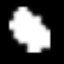

In [ ]:
convert_values_to_image(training_digits_images.loc[0], True)

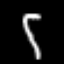

In [ ]:
convert_values_to_image(training_digits_images.loc[2], True)

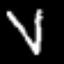

In [ ]:
convert_values_to_image(training_digits_images.loc[7], True)

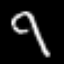

In [ ]:
convert_values_to_image(training_digits_images.loc[9], True)

## Data Preprocessing

### Image Normalization
We rescale the images by dividing every pixel in the image by 255 to make them into range [0, 1]

In [ ]:
training_digits_images_scaled = training_digits_images.values.astype('float32')/255
training_digits_labels = training_digits_labels.values.astype('int32')
testing_digits_images_scaled = testing_digits_images.values.astype('float32')/255
testing_digits_labels = testing_digits_labels.values.astype('int32')

In [ ]:
print("Training images of digits after scaling")
print(training_digits_images_scaled.shape)
training_digits_images_scaled[0:5]

Training images of digits after scaling
(60000, 4096)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Encoding Categorical Labels
From the labels csv files we can see that labels are categorical values and it is a multi-class classification problem. 

Our outputs are in the form of:
* Digits from 0 to 9 have categories numbers from 0 to 9

**Here we will encode these categories values using One Hot Encoding with keras.**

One-hot encoding transforms integer to a binary matrix where the array contains only one ‘1’ and the rest elements are ‘0’.



In [ ]:
from tensorflow.keras.utils import to_categorical

# one hot encoding
# number of classes = 10 (digits classes)
number_of_classes = 10

training_digits_labels_encoded = to_categorical(training_digits_labels, num_classes=number_of_classes)
testing_digits_labels_encoded = to_categorical(testing_digits_labels, num_classes=number_of_classes)

In [ ]:
print(training_digits_labels_encoded)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


### Reshaping Input Images to 64x64x1


When using TensorFlow as backend, Keras CNNs require a 4D array (which we'll also refer to as a 4D tensor) as input, with shape
(nb_samples,rows,columns,channels)

where nb_samples corresponds to the total number of images (or samples), and rows, columns, and channels correspond to the number of rows, columns, and channels for each image, respectively.

**So we will reshape the input images to a 4D tensor with shape
(nb_samples, 64, 64 ,1)** as we use grayscale images of 64x64 pixels.

In [ ]:
# reshape input digit images to 64x64x1
training_digits_images_scaled = training_digits_images_scaled.reshape([-1, 64, 64, 1])
testing_digits_images_scaled = testing_digits_images_scaled.reshape([-1, 64, 64, 1])


print(training_digits_images_scaled.shape, training_digits_labels_encoded.shape, testing_digits_images_scaled.shape, testing_digits_labels_encoded.shape)

(60000, 64, 64, 1) (60000, 10) (10000, 64, 64, 1) (10000, 10)


### Merging Letters and Digits Datasets

In [ ]:
training_data_images = training_digits_images_scaled 
training_data_labels = training_digits_labels_encoded
print("Total Training images are {} images of shape".format(training_data_images.shape[0]))
print(training_data_images.shape, training_data_labels.shape)


testing_data_images = testing_digits_images_scaled
testing_data_labels = testing_digits_labels_encoded
print("Total Testing images are {} images of shape".format(testing_data_images.shape[0]))
print(testing_data_images.shape, testing_data_labels.shape)


Total Training images are 60000 images of shape
(60000, 64, 64, 1) (60000, 10)
Total Testing images are 10000 images of shape
(10000, 64, 64, 1) (10000, 10)


## Designing Model Architecture

Now we will make a method which creates the model architecture with the specified optimizer and activation functions.

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Dropout, Dense

def create_model(optimizer='adam', kernel_initializer='he_normal', activation='relu'):
  # create model
  model = Sequential()
  model.add(Conv2D(filters=16, kernel_size=3, padding='same', input_shape=(64, 64, 1), kernel_initializer=kernel_initializer, activation=activation))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.2))

  model.add(Conv2D(filters=32, kernel_size=3, padding='same', kernel_initializer=kernel_initializer, activation=activation))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.2))

  model.add(Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer=kernel_initializer, activation=activation))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.2))

  model.add(Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer=kernel_initializer, activation=activation))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.2))
  model.add(GlobalAveragePooling2D())
  
  #Fully connected final layer
  model.add(Dense(10, activation='softmax'))

  # Compile model
  model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
  return model

Let’s understand above code step by step.

* The first hidden layer is a convolutional layer. The layer has 16 feature maps, which with the size of 3×3 and an activation function which is relu. This is the input layer, expecting images with the structure outlined above.
* The second layer is Batch Normalization which solves having distributions of the features vary across the training and test data, which breaks the IID assumption. We use it to help in two ways faster learning and higher overall accuracy. 
* The third layer is the MaxPooling layer. MaxPooling layer is used to down-sample the input to enable the model to make assumptions about the features so as to reduce overfitting. It also reduces the number of parameters to learn, reducing the training time.
* The next layer is a Regularization layer using dropout. It is configured to randomly exclude 20% of neurons in the layer in order to reduce overfitting.
* Another hidden layer with 32 feature maps with the size of 3×3 and a relu activation function to capture more features from the image.
* Other hidden layers with 64 and 128 feature maps with the size of 3×3 and a relu activation function to capture complex patterns from the image which will decribe the digits and letters later.
* More MaxPooling, Batch Normalization, Regularization and GlobalAveragePooling2D layers.
* The last layer is the output layer with 10 neurons (number of output classes) and it uses softmax activation function as we have multi-classes. Each neuron will give the probability of that class.

I used categorical_crossentropy as a loss function because its a multi-class classification problem. I used accuracy as metrics to improve the performance of our neural network.

## Model Summary And Visualization

Let's see the model summary.

In [ ]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        160       
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 16)       64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       1

Keras support plotting the model in keras.utils.vis_utils module which provides utility functions to plot a Keras model using graphviz.

To be able to use that utility we should first install pydot and graphviz modules. This can be done by running the following code cell then restart the runtime environment.

In [ ]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot

Now we can plot the model and save it to a file also.

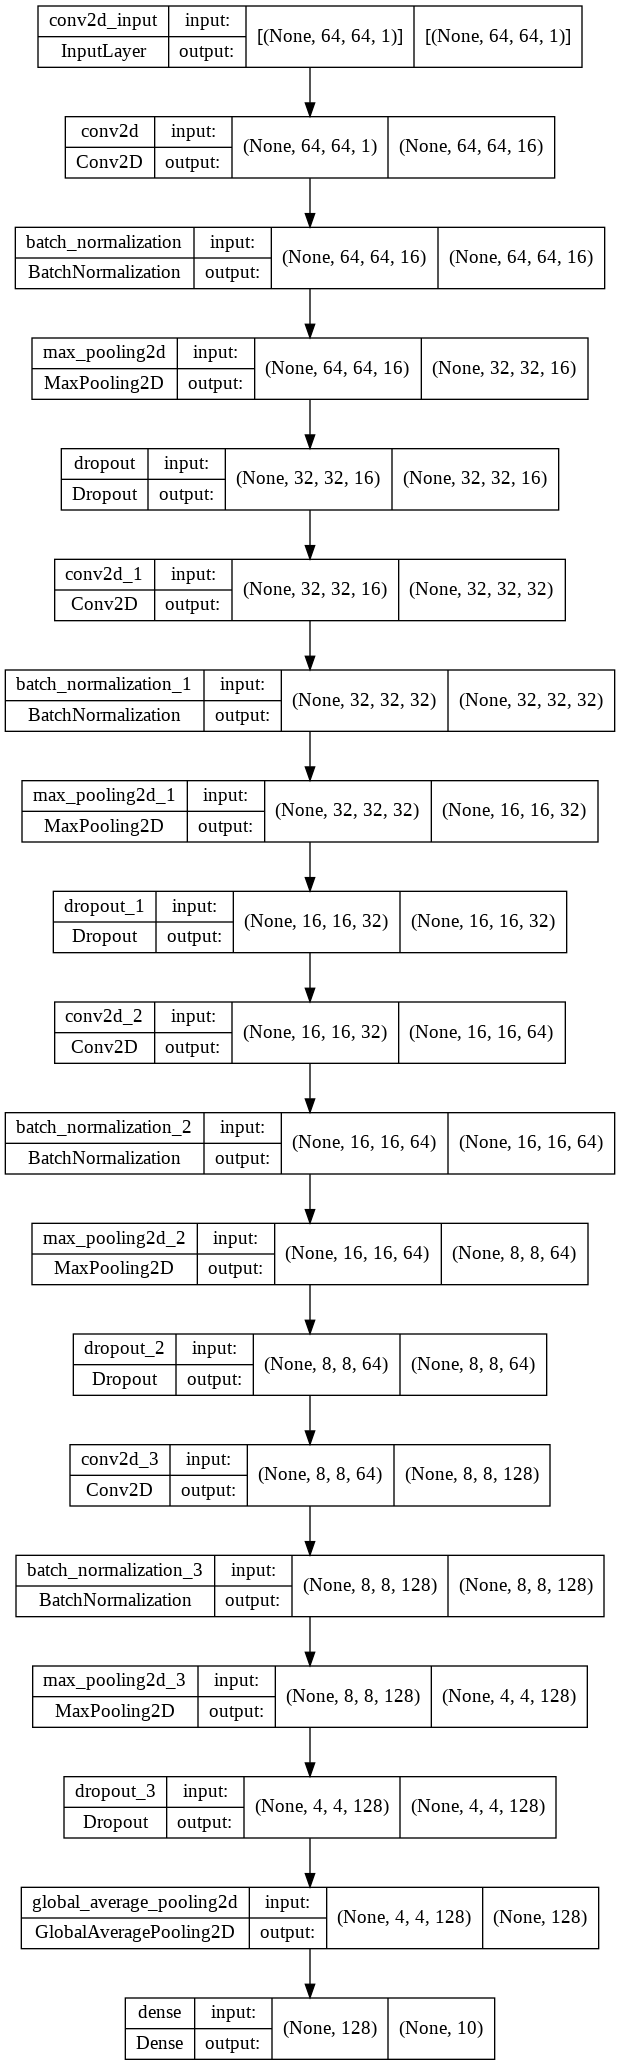

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file="model.png", show_shapes=True)
from IPython.display import Image as IPythonImage
display(IPythonImage('model.png'))

## Parameters Tuning

**From the results of pre defined model we can see that best parameters are:**
* **Optimizer: Adam**
* **Kernel_initializer: uniform**
* **Activation: relu** 

Let's create the model with the best parameters obtained.

In [ ]:
model = create_model(optimizer='Adam', kernel_initializer='uniform', activation='relu')

## Training the Model


### Fitting the Model

Train the model using batch_size=20 to reduce used memory and make the training more quick.
We will train the model first on 10 epochs to see the accuracy that we will obtain.

In [ ]:
from keras.callbacks import ModelCheckpoint  

# using checkpoints to save model weights to be used later instead of training again on the same epochs.
checkpointer = ModelCheckpoint(filepath='weights.hdf5', verbose=1, save_best_only=True)
history = model.fit(training_data_images, training_data_labels, 
                    validation_data=(testing_data_images, testing_data_labels),
                    epochs=10, batch_size=20, verbose=1, callbacks=[checkpointer])

Epoch 1/10
2997/3000 [============================>.] - ETA: 0s - loss: 0.1020 - accuracy: 0.9741
Epoch 1: val_loss improved from inf to 0.04989, saving model to weights.hdf5
3000/3000 [==============================] - 43s 10ms/step - loss: 0.1020 - accuracy: 0.9741 - val_loss: 0.0499 - val_accuracy: 0.9864
Epoch 2/10
2999/3000 [============================>.] - ETA: 0s - loss: 0.0344 - accuracy: 0.9903
Epoch 2: val_loss improved from 0.04989 to 0.04299, saving model to weights.hdf5
3000/3000 [==============================] - 29s 10ms/step - loss: 0.0344 - accuracy: 0.9903 - val_loss: 0.0430 - val_accuracy: 0.9878
Epoch 3/10
2998/3000 [============================>.] - ETA: 0s - loss: 0.0287 - accuracy: 0.9913
Epoch 3: val_loss improved from 0.04299 to 0.02697, saving model to weights.hdf5
3000/3000 [==============================] - 29s 10ms/step - loss: 0.0287 - accuracy: 0.9913 - val_loss: 0.0270 - val_accuracy: 0.9914
Epoch 4/10
2995/3000 [============================>.] - ETA: 0

## Saving the Final Model

In [ ]:
!pip install tensorflowjs
import keras
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model, './tfjs_models')
!zip -r ./tfjs_files_digit_only.zip ./tfjs_models/
from google.colab import files
files.download("./tfjs_files_digit_only.zip")

     |████████████████████████████████| 77 kB 6.3 MB/s 
     |████████████████████████████████| 462 kB 66.1 MB/s 
  adding: tfjs_models/ (stored 0%)
  adding: tfjs_models/model.json (deflated 87%)
  adding: tfjs_models/group1-shard1of1.bin (deflated 7%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Plotting Loss and Accuracy Curves with Epochs

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_accuracy(history):
  # Loss Curves
  plt.figure(figsize=[8,6])
  plt.plot(history.history['loss'],'r',linewidth=3.0)
  plt.plot(history.history['val_loss'],'b',linewidth=3.0)
  plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
  plt.xlabel('Epochs ',fontsize=16)
  plt.ylabel('Loss',fontsize=16)
  plt.title('Loss Curves',fontsize=16)

  # Accuracy Curves
  plt.figure(figsize=[8,6])
  plt.plot(history.history['accuracy'],'r',linewidth=3.0)
  plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
  plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
  plt.xlabel('Epochs ',fontsize=16)
  plt.ylabel('Accuracy',fontsize=16)
  plt.title('Accuracy Curves',fontsize=16) 

In [ ]:
print(history.history)

{'loss': [0.10198875516653061, 0.03437978774309158, 0.0286860428750515, 0.024470079690217972, 0.02077201008796692, 0.019550839439034462, 0.01758578233420849, 0.016528846696019173, 0.015866795554757118, 0.014046267606317997], 'accuracy': [0.974133312702179, 0.9902999997138977, 0.9912833571434021, 0.9926333427429199, 0.9937499761581421, 0.9938166737556458, 0.9944666624069214, 0.9949333071708679, 0.9950000047683716, 0.9956499934196472], 'val_loss': [0.04989004507660866, 0.04298899322748184, 0.026974014937877655, 0.027746854349970818, 0.44102099537849426, 0.035689957439899445, 0.03212364390492439, 0.024112094193696976, 0.0214084405452013, 0.0316859632730484], 'val_accuracy': [0.9864000082015991, 0.9878000020980835, 0.9914000034332275, 0.9914000034332275, 0.8604999780654907, 0.9890000224113464, 0.9908000230789185, 0.9927999973297119, 0.9944000244140625, 0.9909999966621399]}


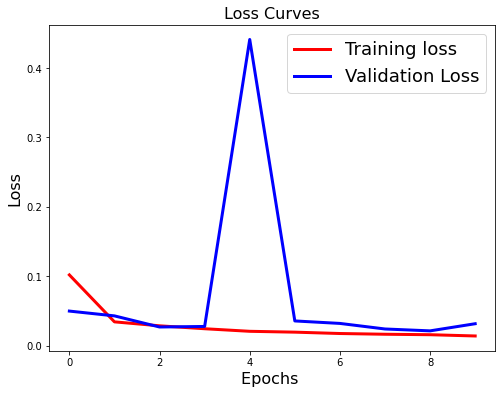

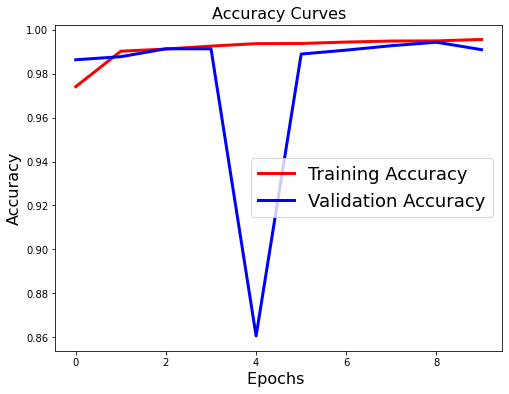

In [ ]:
plot_loss_accuracy(history)

### Load the Model with the Best Validation Loss


In [ ]:
model.load_weights('weights.hdf5')

## Test the Model


In [ ]:
# Final evaluation of the model
metrics = model.evaluate(testing_data_images, testing_data_labels, verbose=1)
print("Test Accuracy: {}".format(metrics[1]))
print("Test Loss: {}".format(metrics[0]))

313/313 [==============================] - 3s 8ms/step - loss: 0.0214 - accuracy: 0.9944
Test Accuracy: 0.9944000244140625
Test Loss: 0.0214084479957819


**We get test accuracy of 99.44% after training on 10 epochs only.**

## Training More on the best model

Epoch 1/20
3000/3000 [==============================] - ETA: 0s - loss: 0.0147 - accuracy: 0.9952
Epoch 1: val_loss improved from inf to 0.02791, saving model to weights.hdf5
3000/3000 [==============================] - 30s 10ms/step - loss: 0.0147 - accuracy: 0.9952 - val_loss: 0.0279 - val_accuracy: 0.9921
Epoch 2/20
2998/3000 [============================>.] - ETA: 0s - loss: 0.0141 - accuracy: 0.9955
Epoch 2: val_loss improved from 0.02791 to 0.02491, saving model to weights.hdf5
3000/3000 [==============================] - 28s 9ms/step - loss: 0.0141 - accuracy: 0.9955 - val_loss: 0.0249 - val_accuracy: 0.9928
Epoch 3/20
2999/3000 [============================>.] - ETA: 0s - loss: 0.0132 - accuracy: 0.9956
Epoch 3: val_loss did not improve from 0.02491
3000/3000 [==============================] - 29s 10ms/step - loss: 0.0132 - accuracy: 0.9956 - val_loss: 0.0286 - val_accuracy: 0.9923
Epoch 4/20
2999/3000 [============================>.] - ETA: 0s - loss: 0.0121 - accuracy: 0.9961

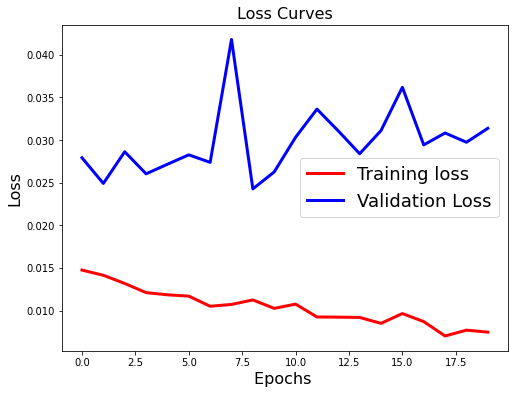

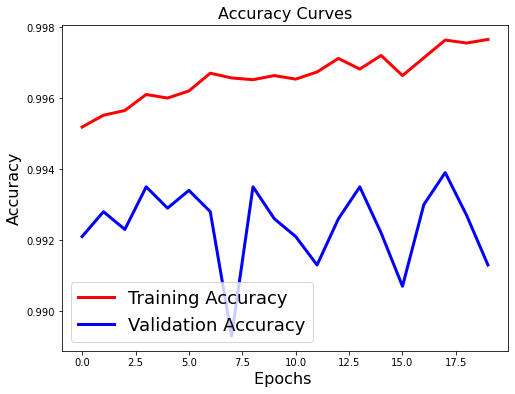

In [ ]:
epochs = 20
batch_size = 20

checkpointer = ModelCheckpoint(filepath='weights.hdf5', verbose=1, save_best_only=True)

history = model.fit(training_data_images, training_data_labels, 
                    validation_data=(testing_data_images, testing_data_labels),
                    epochs=epochs, batch_size=batch_size, verbose=1, callbacks=[checkpointer])
          
model.load_weights('weights.hdf5')
plot_loss_accuracy(history)

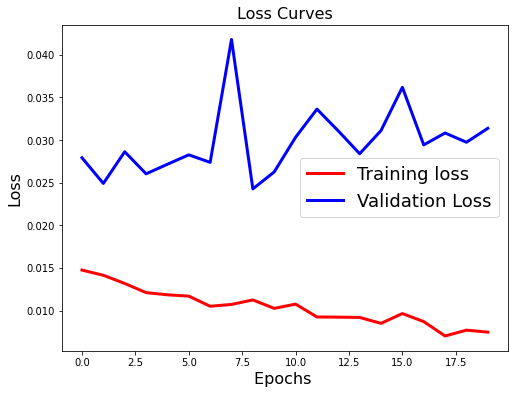

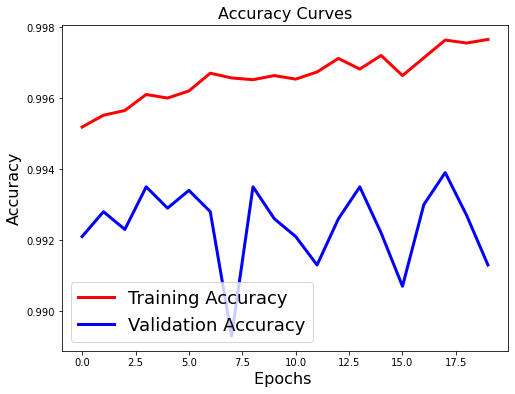

In [ ]:
plot_loss_accuracy(history)

## Testing the Model again

In [ ]:
# Final evaluation of the model
metrics = model.evaluate(testing_data_images, testing_data_labels, verbose=1)
print("Test Accuracy: {}".format(metrics[1]))
print("Test Loss: {}".format(metrics[0]))

313/313 [==============================] - 2s 7ms/step - loss: 0.0243 - accuracy: 0.9935
Test Accuracy: 0.9934999942779541
Test Loss: 0.024266814813017845


After training the model on more epochs we gained a better model which can classify complex patterns . So when we tested it on our test dataset we had better results than before.

**Test accuracy is deteriorated from 99.44% to 99.35% As we train the model on 20 more epochs.**



## Saving the Final Model

Save the model weights to file.

In [ ]:
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


## Benchmark Model

We will use a very simple (vanilla) CNN model as benchmark and Train/test it using the same data that you have used for our model solution.
Then Compare the results between the vanilla model and our complex model.

In [ ]:
baseline_model = Sequential()
baseline_model.add(Conv2D(filters=16, kernel_size=3, padding='same', input_shape=(64, 64, 1), activation='relu')) # Input layer
baseline_model.add(GlobalAveragePooling2D())
baseline_model.add(Dense(10, activation = 'softmax')) # Output layer => output dimension = 38 as it is multi-class

# Compile the baseline model
baseline_model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='Adam')

# Fit the baseline model with training dataset
epochs = 5
batch_size = 20

baseline_model.fit(training_data_images, training_data_labels, 
                  validation_data=(testing_data_images, testing_data_labels),
                  epochs=epochs, batch_size=batch_size, verbose=1)

# Test the baseline model
baseline_metrics = baseline_model.evaluate(testing_data_images, testing_data_labels, verbose=1)
print("Baseline Model Test Accuracy: {}".format(baseline_metrics[1]))
print("Baseline Model Test Loss: {}".format(baseline_metrics[0]))


Epoch 1/5
3000/3000 [==============================] - 16s 5ms/step - loss: 1.9698 - accuracy: 0.2508 - val_loss: 1.8351 - val_accuracy: 0.3017
Epoch 2/5
3000/3000 [==============================] - 15s 5ms/step - loss: 1.8018 - accuracy: 0.3073 - val_loss: 1.8102 - val_accuracy: 0.3115
Epoch 3/5
3000/3000 [==============================] - 15s 5ms/step - loss: 1.7865 - accuracy: 0.3115 - val_loss: 1.8031 - val_accuracy: 0.3086
Epoch 4/5
3000/3000 [==============================] - 15s 5ms/step - loss: 1.7773 - accuracy: 0.3187 - val_loss: 1.7927 - val_accuracy: 0.3305
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 1.7787 - accuracy: 0.3204
Baseline Model Test Accuracy: 0.3203999996185303
Baseline Model Test Loss: 1.7786593437194824


**We get test accuracy of 32.04% from the baseline Model (vanilla). **

## Predict Image Classes

Making a method which takes a model, data and its true labels (optional for using in testing). Then it gives the predicted classes of the given data using the given model.

In [ ]:
def get_predicted_classes(model, data, labels=None):
  image_predictions = model.predict(data)
  predicted_classes = np.argmax(image_predictions, axis=1)
  true_classes = np.argmax(labels, axis=1)
  return predicted_classes, true_classes

In [ ]:
testing_digits_images_scaled[4].shape

(64, 64, 1)

In [ ]:
ar = model.predict(testing_digits_images_scaled)

In [ ]:
i=29

In [ ]:
print(ar[i])

[1.02629595e-13 3.45564376e-16 2.61164567e-14 8.01761270e-18
 2.99270039e-15 6.71616755e-12 1.81409358e-13 1.89275468e-18
 1.47931366e-16 1.00000000e+00]


In [ ]:
print(testing_digits_labels_encoded[i])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


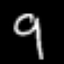

In [ ]:
convert_values_to_image(testing_digits_images.loc[i], True)

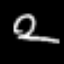

In [ ]:
convert_values_to_image_wtf(testing_digits_images.loc[i], True)

## Comparing Evaluation Metrics between Benchmark Model and Final Model

Making a method which will print all metrics (precision, recall, f1-score and support) with each class in the dataset.

In [ ]:
from sklearn.metrics import classification_report

def get_classification_report(y_true, y_pred):
  print(classification_report(y_true, y_pred))

### Evaluating Final Model using the specified metrics

In [ ]:
y_pred, y_true = get_predicted_classes(model, testing_data_images, testing_data_labels)
get_classification_report(y_true, y_pred)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1000
           1       0.99      1.00      0.99      1000
           2       0.98      1.00      0.99      1000
           3       1.00      0.99      1.00      1000
           4       1.00      0.99      0.99      1000
           5       0.99      0.99      0.99      1000
           6       0.99      1.00      1.00      1000
           7       1.00      1.00      1.00      1000
           8       1.00      0.99      1.00      1000
           9       1.00      0.99      1.00      1000

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### Evaluating Baseline (Benchmark) Model using the specified metrics

In [ ]:
y_pred, y_true = get_predicted_classes(baseline_model, testing_data_images, testing_data_labels)
get_classification_report(y_true, y_pred)

              precision    recall  f1-score   support

           0       0.82      0.77      0.79      1000
           1       0.44      0.80      0.57      1000
           2       0.00      0.00      0.00      1000
           3       0.16      0.28      0.21      1000
           4       0.00      0.00      0.00      1000
           5       0.43      0.57      0.49      1000
           6       0.19      0.24      0.21      1000
           7       0.19      0.49      0.28      1000
           8       0.00      0.00      0.00      1000
           9       0.15      0.06      0.08      1000

    accuracy                           0.32     10000
   macro avg       0.24      0.32      0.26     10000
weighted avg       0.24      0.32      0.26     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## A Demo to see how the model works on examples of the testing data

Let's recall:
* Digits from 0 to 9 were encoded to categorical labels from 0 to 9

**Recall that we have used One Hot Encoding which transforms integer to a binary matrix where the array contains only one ‘1’ and the rest elements are ‘0’.**

In [ ]:
def get_non_zero_index_from_one_hot_encoding(one_hot_encoding):
  non_zero_index = np.where(one_hot_encoding == 1)[0]
  assert(len(non_zero_index) == 1)
  non_zero_index = non_zero_index[0]
  return non_zero_index

In [ ]:
def convert_categorical_label_to_real_label(categorical_label):
  real_labels = []
  real_labels.extend([x for x in range(10)])
  real_labels.extend(['أ', 'ب', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 'ذ', 'ر', 'ز', 'س', 'ش', 'ص', 'ض', 'ط', 'ظ', 'ع', 'غ', 'ف', 'ق', 'ك', 'ل', 'م', 'ن', 'ه', 'و', 'ى'])
  return real_labels[categorical_label]

In [ ]:
def show_example(sample_index):
  y_pred, y_true = get_predicted_classes(model, testing_data_images[[sample_index]], testing_data_labels[[sample_index]])
  non_zero_index = get_non_zero_index_from_one_hot_encoding(testing_data_labels[sample_index])
  y_true = y_true[0]
  y_pred = y_pred[0]
  assert y_true == non_zero_index
  true_label = convert_categorical_label_to_real_label(y_true)
  predicted_label = convert_categorical_label_to_real_label(y_pred)
  print("The following image has the written character '{}' but the model predicted it as '{}'".format(true_label, predicted_label))
  return true_label == predicted_label

The following image has the written character '5' but the model predicted it as '5'


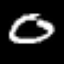

In [ ]:
sample_index = 5
show_example(sample_index)
convert_values_to_image(testing_digits_images.loc[sample_index], True)

## Conclusion

**We built a CNN model which can classify the arabic handwritten images into digits. We tested the model on more than 10000 image with all possible classes and got very high accuracy of 99.35%.**